In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import pandas as pd
import sympy as sym
import warnings
from IPython.display import display, Math
from numpy.lib.scimath import sqrt as csqrt

# Reflectivity x Normalized wavelength

for kL = 1.6:


,For L = 0.5mm,For L = 1.0mm,For L = 2.0mm,For L = 3.0mm
0,k = 3200.0,k = 1600.0,k = 800.0,k = 533.3333333333334


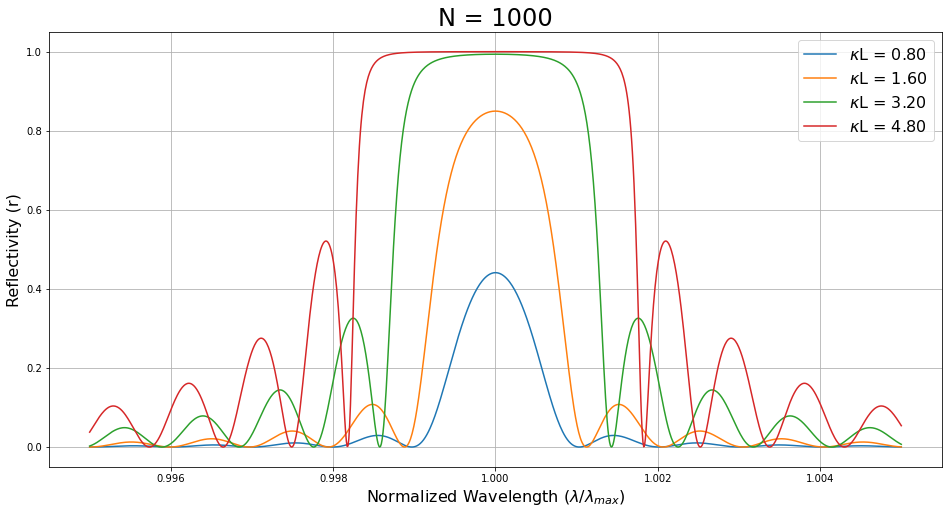

In [6]:
L = 0.001                  # Total length (not necessary)
N = 1000                   # Number of grattings
kL = 1.6                   # kappa * Length
points = 1000
ratios = [0.5 , 1 , 2, 3]

correlations = {}
warnings.filterwarnings("ignore")

plt.figure(figsize=(16, 8))
plt.title('N = {:}'.format(N), fontsize=24)
plt.grid(True)
for i in ratios:

    ikappa = kL*i/L
    correlations['For L = ' + str(L*1000*i) + 'mm'] = ['k = ' + str(kL/(L*i))]

    NormWL = np.linspace(0.995, 1.005, points)
    gSigma = ((1/NormWL)-1)*(np.pi*N/L) 
    ksig = csqrt(ikappa**2 - gSigma**2)
    r = ((np.sinh(ksig * L))**2) / ((np.cosh(ksig * L))**2  - (gSigma**2)/(ikappa**2))

    plt.plot(NormWL,r,label=r'$\kappa$L = ' + '{:.2f}'.format(ikappa*L))
    plt.xlabel(r'Normalized Wavelength ($\lambda$/$\lambda_{max}$)', fontsize=16)
    plt.ylabel('Reflectivity (r)', fontsize=16)

plt.legend(fontsize=16)
print('for kL = {:}:'.format(kL))
dataFrame = pd.DataFrame(correlations)
dataFrame

#plt.savefig("out.png", transparent=True)

# Reflectivity x Wavelength

## Free max reflectivity

<IPython.core.display.Math object>

<IPython.core.display.Math object>

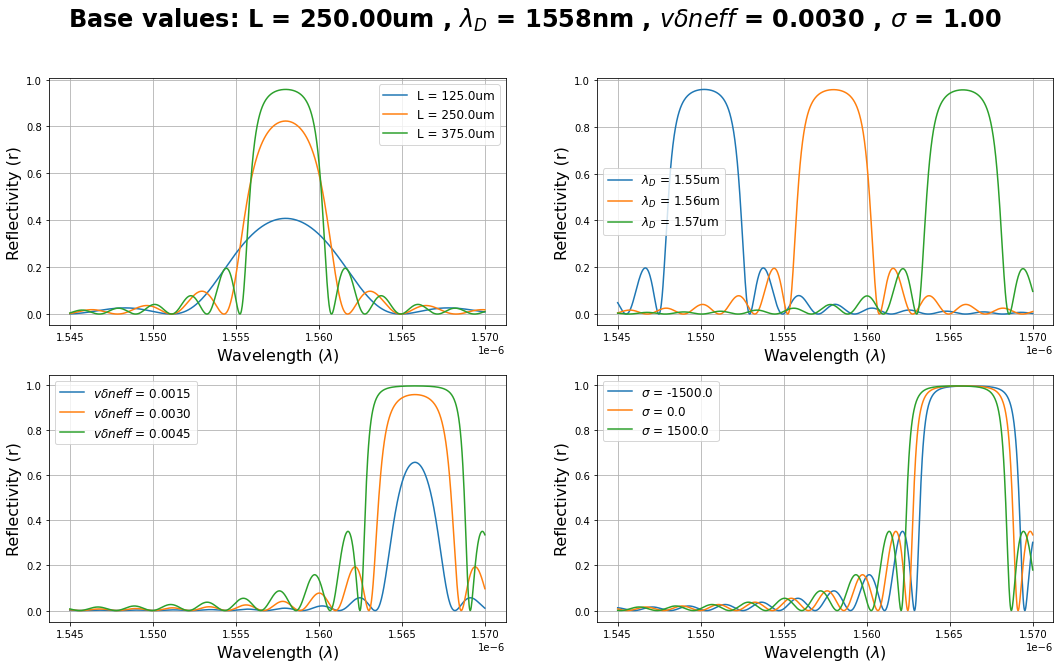

In [62]:
neff = 1.447
sigma = 1
designWv = 1558e-9                     # Design wavelength
L = 250e-6                             # Total length
vneff = 30e-4                          # AC part of induced index change

points = 1000
ratiosA = [0.5 , 1 , 1.5]              # Ratio for L and vneff sweeps
ratiosB = [0.995 , 1 , 1.005]          # Ratio for designWv sweep
ratiosC = [-1500 , 0 , 1500]           # Ratio for sigma sweep
wvlen = np.linspace(1.545e-6, 1.57e-6, points)

N = 2*neff*L/designWv             
kappa = (np.pi/(designWv))*vneff

display(Math('Base~~values:'))
display(Math('N = %5.2f ,~~~~ \kappa = %5.2f ,~~~~ \kappa L = %5.2f ,~~~~ r_{max} = %5.2f' %(N, kappa, kappa*L, np.tanh(kappa*L)**2)))

figure,ax=plt.subplots(2, 2,figsize=(18,10))
figure.suptitle(r'Base values: L = {:.2f}um , $\lambda_D$ = {:.0f}nm , $v\delta neff$ = {:.4f} , $\sigma$ = {:.2f}'.format(1e6*L,1e9*designWv,vneff,sigma), fontsize=24, fontweight="bold")

for i in ratiosA:
    iL = L*i

    N = 2*neff*iL/designWv             
    gSigma = (2*np.pi*neff)/wvlen - sigma - (N*np.pi/iL)
    kappa = (np.pi/(designWv))*vneff
    ksig = csqrt(kappa**2 - gSigma**2)
    r = ((np.sinh(ksig * iL))**2) / ((np.cosh(ksig * iL))**2  - (gSigma**2)/(kappa**2))

    ax[0][0].plot(wvlen,r,label='L = ' + str(iL*1e6) + 'um')
    ax[0][0].set_xlabel(r'Wavelength ($\lambda$)', fontsize=16)
    ax[0][0].set_ylabel('Reflectivity (r)', fontsize=16)
    ax[0][0].grid(True)
    ax[0][0].legend(fontsize=12)

for i in ratiosB:
    iDesWv = designWv*i

    N = 2*neff*iL/iDesWv             
    gSigma = (2*np.pi*neff)/wvlen - sigma - (N*np.pi/iL)
    kappa = (np.pi/(iDesWv))*vneff
    ksig = csqrt(kappa**2 - gSigma**2)
    r = ((np.sinh(ksig * iL))**2) / ((np.cosh(ksig * iL))**2  - (gSigma**2)/(kappa**2))

    ax[0][1].plot(wvlen,r,label= r'$\lambda_D$ = ' + '{:.2f}um'.format(iDesWv*1e6))
    ax[0][1].set_xlabel(r'Wavelength ($\lambda$)', fontsize=16)
    ax[0][1].set_ylabel('Reflectivity (r)', fontsize=16)
    ax[0][1].grid(True)
    ax[0][1].legend(fontsize=12)

for i in ratiosA:
    ivneff = vneff*i

    N = 2*neff*iL/iDesWv             
    gSigma = (2*np.pi*neff)/wvlen - sigma - (N*np.pi/iL)
    kappa = (np.pi/(iDesWv))*ivneff
    ksig = csqrt(kappa**2 - gSigma**2)
    r = ((np.sinh(ksig * iL))**2) / ((np.cosh(ksig * iL))**2  - (gSigma**2)/(kappa**2))

    ax[1][0].plot(wvlen,r,label= r'$v\delta neff$ = ' + '{:.4f}'.format(ivneff))
    ax[1][0].set_xlabel(r'Wavelength ($\lambda$)', fontsize=16)
    ax[1][0].set_ylabel('Reflectivity (r)', fontsize=16)
    ax[1][0].grid(True)
    ax[1][0].legend(fontsize=12)

for i in ratiosC:
    isigma = sigma*i

    N = 2*neff*iL/iDesWv             
    gSigma = (2*np.pi*neff)/wvlen - isigma - (N*np.pi/iL)
    kappa = (np.pi/(iDesWv))*ivneff
    ksig = csqrt(kappa**2 - gSigma**2)
    r = ((np.sinh(ksig * iL))**2) / ((np.cosh(ksig * iL))**2  - (gSigma**2)/(kappa**2))

    ax[1][1].plot(wvlen,r,label= r'$\sigma$ = ' + '{:.1f}'.format(isigma))
    ax[1][1].set_xlabel(r'Wavelength ($\lambda$)', fontsize=16)
    ax[1][1].set_ylabel('Reflectivity (r)', fontsize=16)
    ax[1][1].grid(True)
    ax[1][1].legend(fontsize=12)

plt.savefig("out.png", transparent=True)

## Locked max reflectivity

<IPython.core.display.Math object>

<IPython.core.display.Math object>

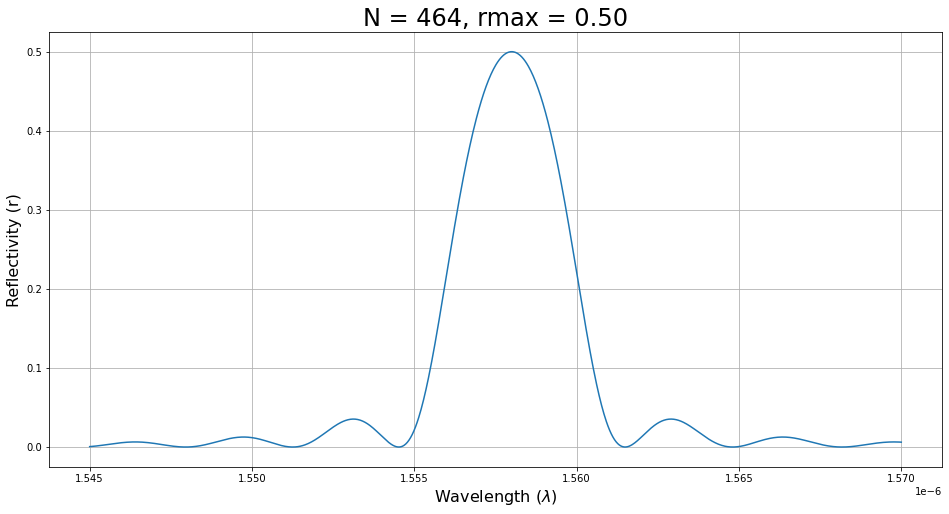

In [78]:
neff = 1.447
sigma = 0
designWv = 1558e-9                     # Design wavelength
L = 250e-6                             # Total length
rmax = 0.5                             # Max reflection

points = 1000
wvlen = np.linspace(1.545e-6, 1.57e-6, points)

N = 2*neff*L/designWv             
gSigma = (2*np.pi*neff)/wvlen - sigma - (N*np.pi/L)
kappa = (np.arctanh(np.sqrt(rmax)))/L
ksig = csqrt(kappa**2 - gSigma**2)
r = ((np.sinh(ksig * L))**2) / ((np.cosh(ksig * L))**2  - (gSigma**2)/(kappa**2))

display(Math('Base~~values:'))
display(Math('N = %5.2f ,~~~~ \kappa = %5.2f ,~~~~ \kappa L = %5.2f' %(N, kappa, kappa*L, )))

plt.figure(figsize=(16, 8))
plt.title('N = {:.0f}, rmax = {:.2f}'.format(N,rmax), fontsize=24)
plt.xlabel(r'Wavelength ($\lambda$)', fontsize=16)
plt.ylabel('Reflectivity (r)', fontsize=16)
plt.plot(wvlen,r)
plt.grid(True)